In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:

# Lire les données du fichier 
file = pd.read_excel("data-sell4all.xlsx")

In [81]:
#Afficher  les 5 premières lignes du fichier
file.head()

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


In [82]:
#  Afficher un résumé technique des données disponibles dans le fichier
print(f"Nombre de lignes  du fichier : {file.shape[0]}")
print(f"Colonnes du fichier  : {file.columns.tolist()}")
print(f" les types de données des champs du fichier CSV :\n{file.dtypes}")

Nombre de lignes  du fichier : 65
Colonnes du fichier  : ['Pays', ' Age ', 'Genre', 'Dépenses des clients']
 les types de données des champs du fichier CSV :
Pays                    object
 Age                    object
Genre                   object
Dépenses des clients    object
dtype: object


In [83]:
# Résumé Technique des Données
markdown = """ Nombre de lignes   Indique le nombre total denregistrements dans le fichier """
display(markdown)
markdown = """ Colonnes du fichier   Liste les noms des colonnes présentes dans le fichier"""
display(markdown)
markdown = """ Types de données des champs   Montre le type de données pour chaque colonne"""
display(markdown)

' Nombre de lignes   Indique le nombre total denregistrements dans le fichier '

' Colonnes du fichier   Liste les noms des colonnes présentes dans le fichier'

' Types de données des champs   Montre le type de données pour chaque colonne'

In [84]:
#  Calculer la médiane et la moyenne de colonne Age  
file.columns = file.columns.str.strip()   # Supprimer les espaces avant et après car on a nom de colune Age est ' Age '
# print([f"'{col}'" for col in file.columns]) 

# Convertit les valeurs de la colonne 'âge' en numérique, en remplaçant les valeurs non convertibles par NaN.
file['Age'] = pd.to_numeric(file['Age'], errors='coerce')
file = file.dropna(subset=['Age'])#Supprime les lignes où la colonne 'âge' contient des NaN.
file['Age'] = file['Age'].astype(int)# Convertit les valeurs de la colonne 'âge' en type int.

# Calculer la médiane
median_age = file['Age'].median()
print(f"\nMédiane de l'âge : {median_age}")

# Calculer la moyenne
moyenne_age = file['Age'].mean()
print(f"Moyenne de l'âge : {moyenne_age}")

#  Calculer la médiane et la moyenne de colonne Dépenses des clients
file.columns = file.columns.str.replace('é', 'e')  # Remplacer les accents si nécessaire
# print([f"'{col}'" for col in file.columns]) 

# Convertit les valeurs de la colonne 'Dépenses des clients' en numérique, en remplaçant les valeurs non convertibles par NaN.
file['Depenses des clients'] = pd.to_numeric(file['Depenses des clients'], errors='coerce')
file = file.dropna(subset=['Depenses des clients']) #Supprime les lignes où la colonne 'Dépenses des clients' contient des NaN.
file['Depenses des clients'] = file['Depenses des clients'].astype(float) # Convertit les valeurs de la colonne 'Dépenses des clients' en type float.
# Calculer la médiane
median_Depenses = file['Depenses des clients'].median()
print(f"\nMédiane de Dépenses des clients : {median_Depenses}")
# Calculer la moyenne
moyenne_Depenses = file['Depenses des clients'].mean()
print(f"Moyenne de Dépenses des clients : {moyenne_Depenses}")


Médiane de l'âge : 36.0
Moyenne de l'âge : 52.42372881355932

Médiane de Dépenses des clients : 167.5
Moyenne de Dépenses des clients : 18014.616964285717


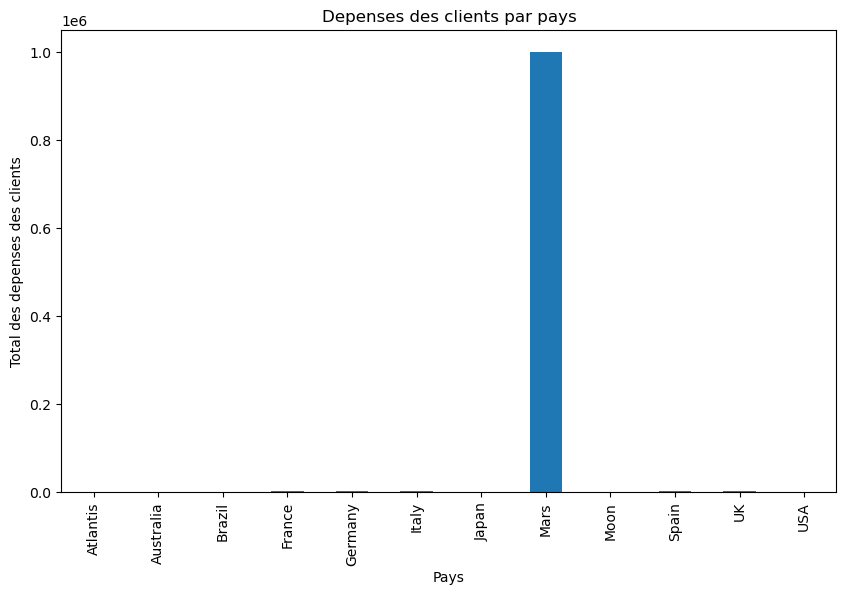

In [85]:
plt.figure(figsize=(10, 6)) # Crée une nouvelle figure 
file.groupby('Pays')['Depenses des clients'].sum().plot(kind='bar') # Regroupe les données par pays, somme les dépenses des clients pour chaque pays, et crée un graphique à barres.
plt.title('Depenses des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Total des depenses des clients') 
plt.show() # Affiche le graphique

In [86]:

# Nettoyage des données
file_cleaned = file[file['Depenses des clients'] >= 10]  # Suppression des lignes avec des dépenses < 10€
file_cleaned = file_cleaned.drop_duplicates()  # Suppression des doublons

# Sauvegarde des données nettoyées dans un nouveau fichier CSV
file_cleaned[['Pays', 'Age', 'Genre', 'Depenses des clients']].to_csv('nouveau-data-sell4all.csv', index=False)
print("\nDonnées nettoyées et enregistrées dans 'nouveau-data-sell4all.csv'.")



Données nettoyées et enregistrées dans 'nouveau-data-sell4all.csv'.
